**Importing neccessary libraries such as pandas, numpy, matplotlib and seaborn**

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**DATA**

In [53]:
df = pd.read_csv("student-mat.csv", sep = ";")

In [54]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


In [55]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


**CHECKING IF THERE ARE MISSING VALUES IN OUR DATA SET.**

In [56]:
sum(df.isnull().mean()*100)

0.0

<AxesSubplot: xlabel='age', ylabel='G3'>

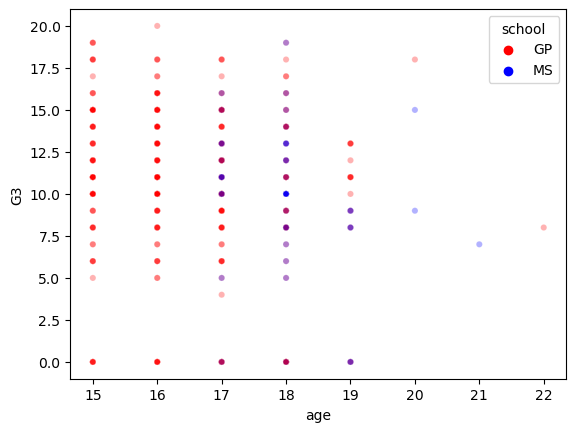

In [57]:
sns.scatterplot(y= "G3",x="age",hue=df["school"], hue_order=["GP","MS"], palette=["red","blue"], alpha = 0.3,s= 20,data = df)

<AxesSubplot: >

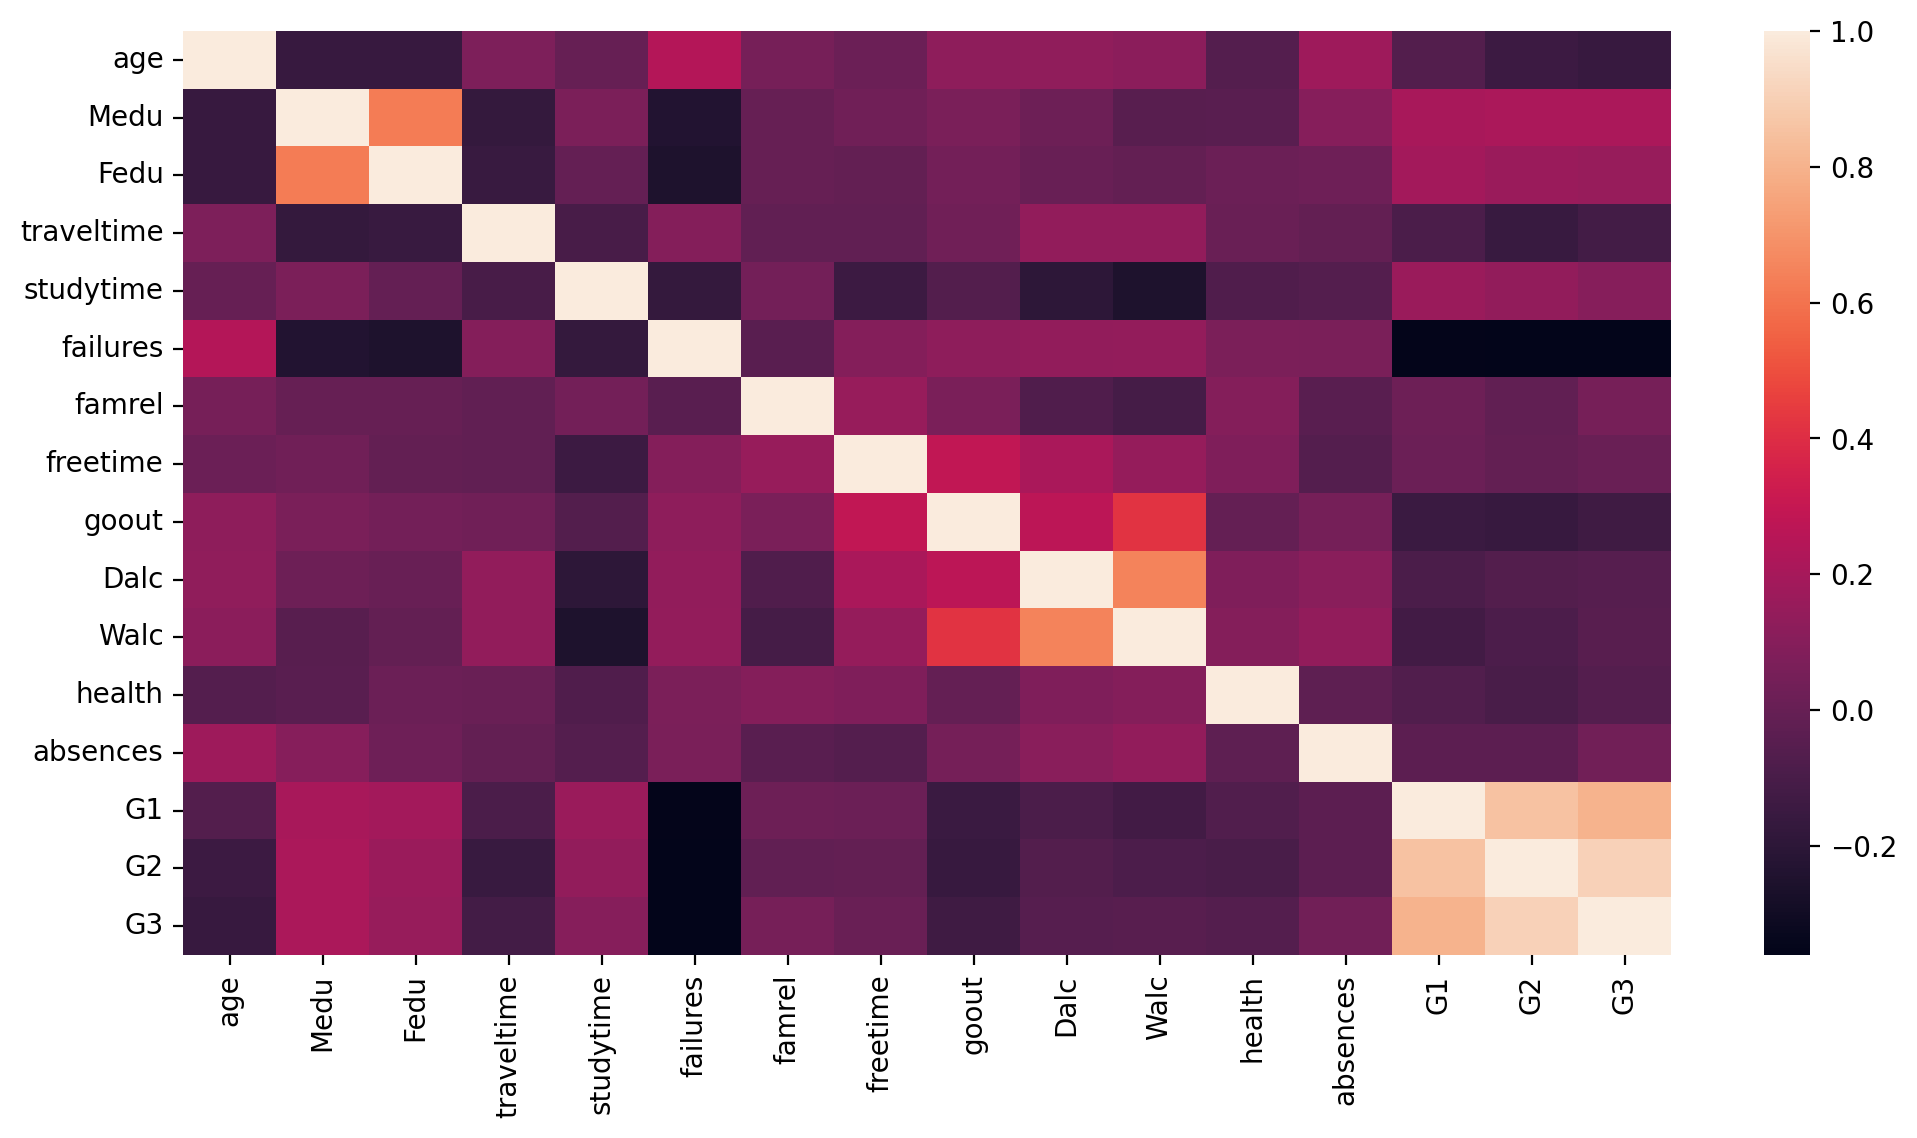

In [58]:
plt.figure(figsize=(12,6),dpi=200)
sns.heatmap(df.corr())

Text(0, 0.5, 'Correlation')

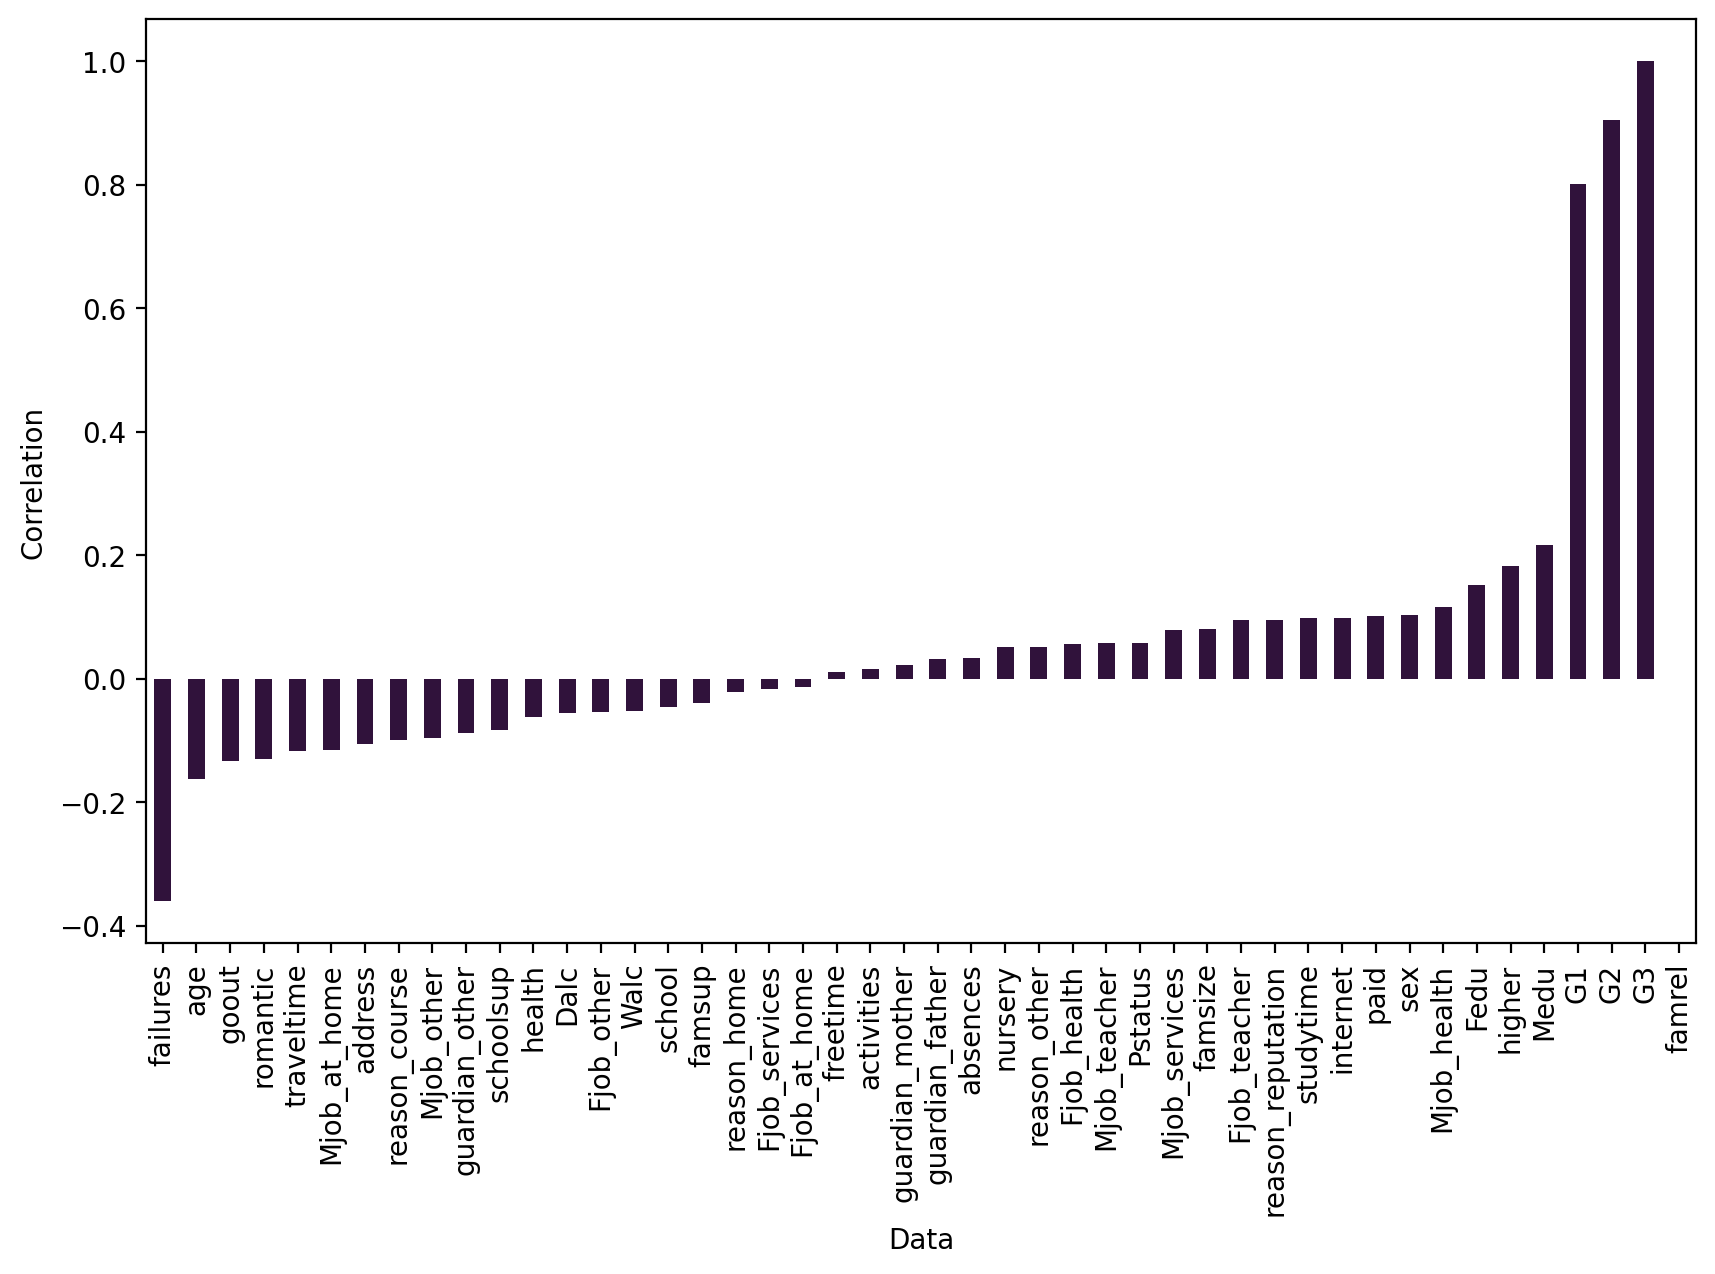

In [88]:
plt.figure(figsize=(10,6),dpi=200)
corr_df = df.corr()["G3"].sort_values()
plt.color_sequences
corr_df.plot(kind="bar", colormap='turbo')
plt.xlabel("Data")
plt.ylabel("Correlation")

**CHECKING IF THERE ARE CRUCIAL OUTLIERS**

<AxesSubplot: xlabel='G3'>

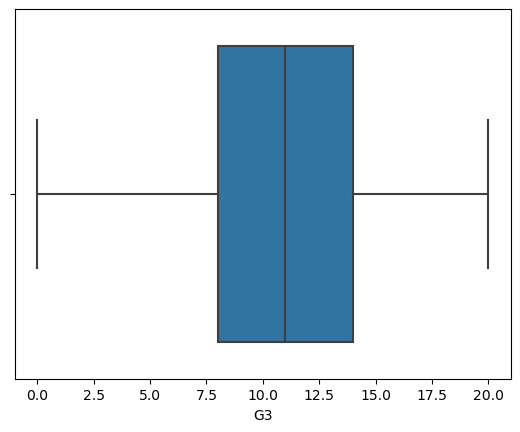

In [60]:
sns.boxplot(x= df["G3"])

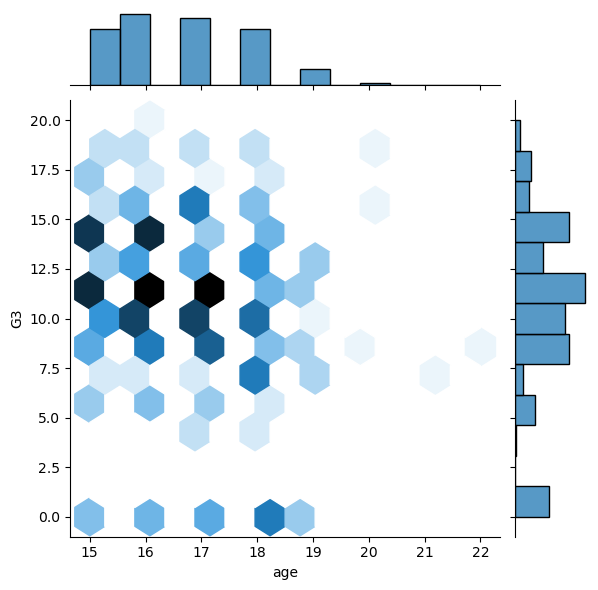

In [61]:
sns.jointplot(y= "G3",x="age", kind='hex',data = df)

**CLEANING DATA AND PROVIDING DUMMY VARIABLES**

In [62]:
def format_data(x, keyword):
    value = 0 if x==keyword else 1
    return value

**LEGEND**
<BR>
**SCHOOL : (GP - 0, MS - 1)**
<BR>
**SEX    : (F - 0, M - 1)**
<BR>
**ADDRESS: (U - 0, R - 1)**
<BR>
**FAMSIZE: (GT3 - 0, LT3 - 1)**
<BR>
**PSTATUS: (T - 0, A - 1)**


In [63]:
df["school"] = df["school"].apply(lambda x: format_data(x,"GP"))
df["sex"] = df["sex"].apply(lambda x:format_data(x,"F"))
df["address"] = df["address"].apply(lambda x:format_data(x,"U"))
df["famsize"] = df["famsize"].apply(lambda x: format_data(x,"GT3"))
df["Pstatus"] = df["Pstatus"].apply(lambda x: format_data(x,"T"))

In [64]:
df.iloc[:,15:24] = df.iloc[:,15:24].applymap(lambda x: format_data(x,"no"))

In [65]:
columns_for_dummy_vars = ["Mjob", "Fjob", "reason","guardian"]
df = pd.get_dummies(df, columns =columns_for_dummy_vars)

In [66]:
pd.set_option('display.max_columns',None)

In [67]:
df.describe()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.0,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,0.116456,0.473418,16.696203,0.222785,0.288608,0.103797,2.749367,2.521519,1.448101,2.035443,0.334177,0.129114,0.612658,0.458228,0.508861,0.794937,0.949367,0.832911,0.334177,1.0,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190,0.149367,0.086076,0.356962,0.260759,0.146835,0.050633,0.045570,0.549367,0.281013,0.073418,0.367089,0.275949,0.091139,0.265823,0.227848,0.691139,0.081013
std,0.321177,0.499926,1.276043,0.416643,0.453690,0.305384,1.094735,1.088201,0.697505,0.839240,0.743651,0.335751,0.487761,0.498884,0.500555,0.404260,0.219525,0.373528,0.472300,0.0,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443,0.356902,0.280832,0.479711,0.439606,0.354391,0.219525,0.208814,0.498188,0.450064,0.261152,0.482622,0.447558,0.288172,0.442331,0.419976,0.462610,0.273201
min,0.000000,0.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,16.000000,0.000000,0.000000,0.000000,2.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.0,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,3.000000,2.000000,1.000000,2.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.0,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,0.000000,1.000000,18.000000,0.000000,1.000000,0.000000,4.000000,3.000000,2.000000,2.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,22.000000,1.000000,1.000000,1.000000,4.000000,4.000000,4.000000,4.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot: xlabel='G1', ylabel='G3'>

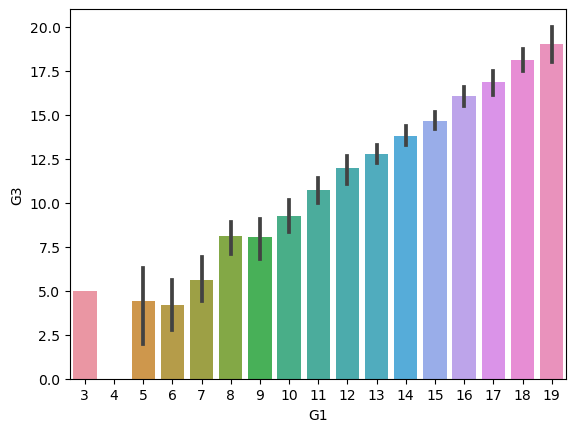

In [68]:
sns.barplot(x="G1", y="G3",data = df)

<AxesSubplot: xlabel='G2', ylabel='G3'>

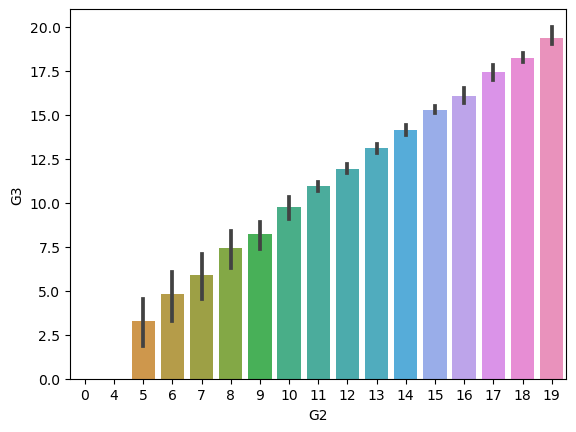

In [69]:
sns.barplot(x="G2", y="G3",data = df)

**IMPORTING NECCESSARY LIBRARIES TO SPLIT AND SCALE THE DATA**

In [70]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [71]:
X = df.drop("G3", axis = 1)
y = df["G3"]

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.10)
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [73]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV

In [74]:
el_model = ElasticNet()
params = {"alpha":[0.1,1,5,10,50,100],"l1_ratio":[0.01,.1,.2,.3,.5,.7,.9,.95,1]}

In [75]:
grid = GridSearchCV(estimator = el_model, param_grid=params,scoring = "neg_mean_squared_error", cv = 5, verbose = 1)

In [76]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [0.1, 1, 5, 10, 50, 100],
                         'l1_ratio': [0.01, 0.1, 0.2, 0.3, 0.5, 0.7, 0.9, 0.95,
                                      1]},
             scoring='neg_mean_squared_error', verbose=1)

In [77]:
grid.best_params_

{'alpha': 0.1, 'l1_ratio': 1}

In [78]:
y_pred = grid.predict(X_test)

In [79]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [80]:
MAE = mean_absolute_error(y_test,y_pred)
print(f'MEAN ABSOLUTE ERROR: {MAE}')

MEAN ABSOLUTE ERROR: 1.1348671207575063


In [81]:
MSE = mean_squared_error(y_test,y_pred)
print(f'MEAN ABSOLUTE ERROR: {MSE}')

MEAN ABSOLUTE ERROR: 2.977022953394486


In [82]:
RMSE = np.sqrt(MSE)
print(f'MEAN ABSOLUTE ERROR: {RMSE}')

MEAN ABSOLUTE ERROR: 1.7254051563022772


****AT THE END I HAVE SHOWN PREDICTED G3 RESULTS AT THE SAME GRAPH AS THE REAL G3 VALUES. RESULTS ARE ARE AS EXPECTED.****

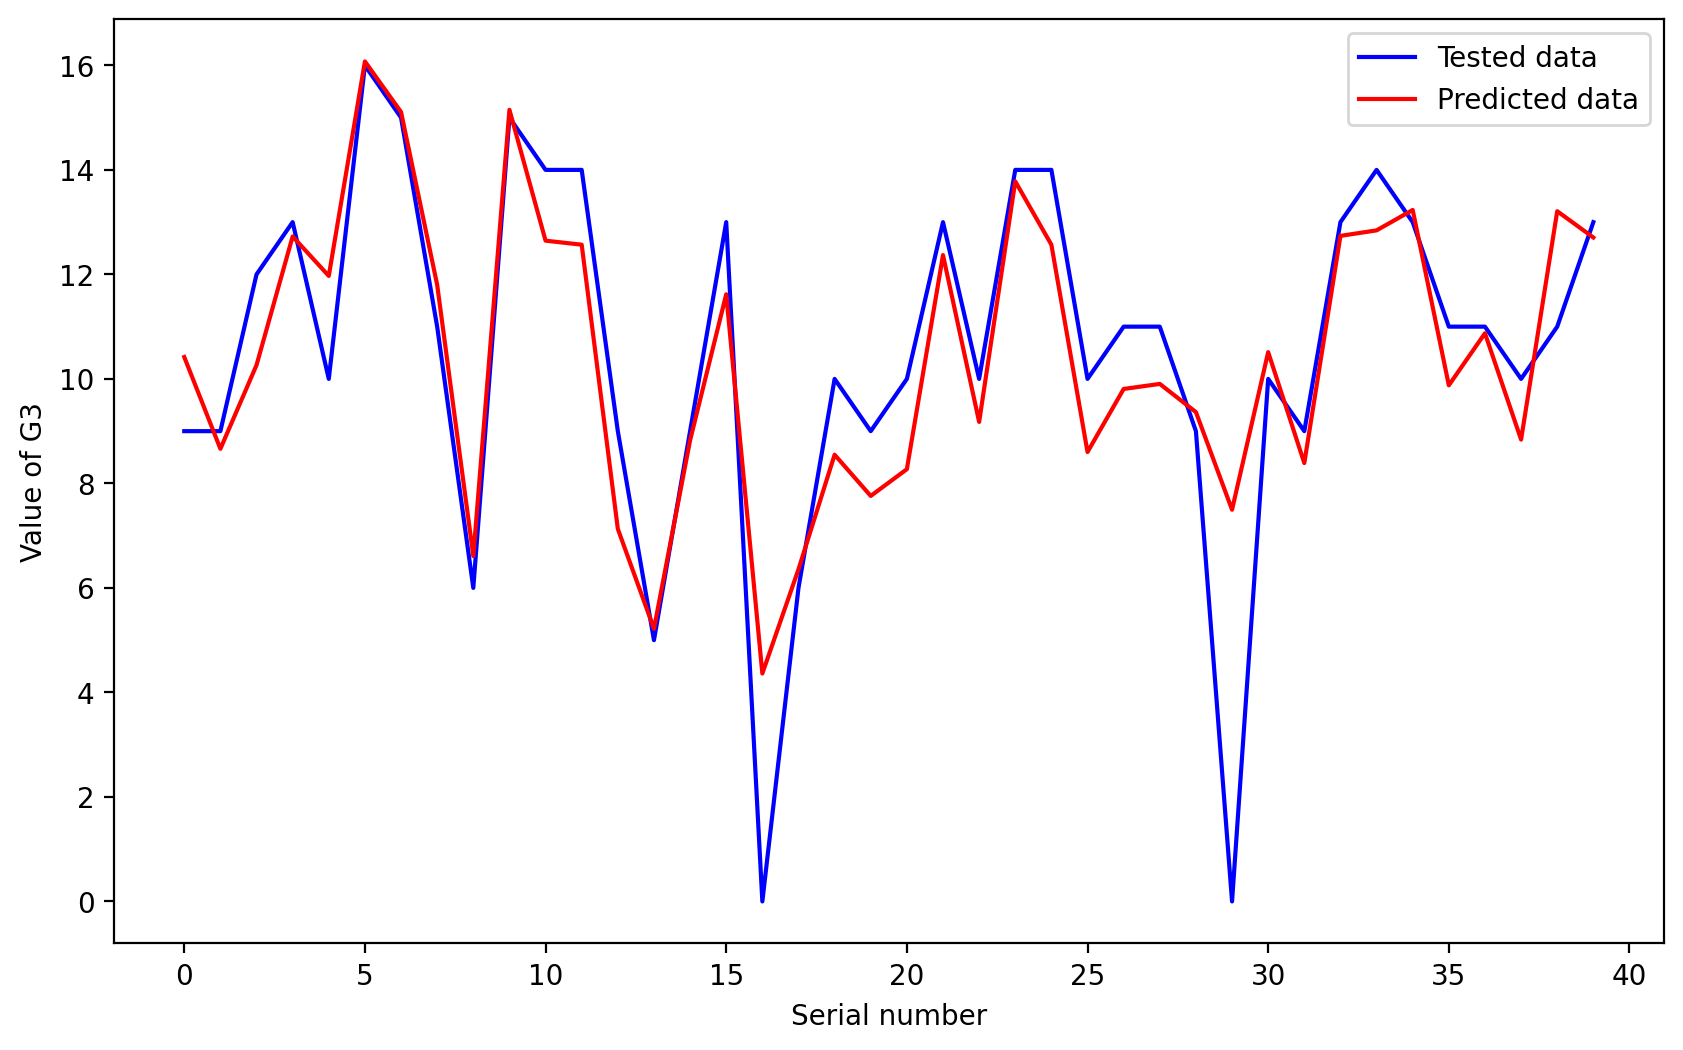

In [91]:
plt.figure(figsize=(10,6), dpi = 200)
plt.plot(range(len(y_test)), y_test, color='blue',label="Tested data")
plt.plot(range(len(y_pred)), y_pred, color='red',label="Predicted data")
plt.xlabel("Serial number")
plt.ylabel("Value of G3")
plt.legend()